In [ ]:
# Observable Trend 1:
# In the Temperature (F) vs. Latitude Graph, it is clear that temperature decreases when latitude increases. 
# Why might this be? It is due to the fact that higher latitudes are currently experiencing a colder season than
# lower latitudes. Meaning, it's winter in latitudes above the equator and summer below the equator.  

# Observable Trend 2:
# There are many more observable cities in the 60 to 80 range than the -80 to -60 range, which might reflect 
# higher population and land area in the northen hemisphere than the southern hemisphere. 

# Observable Trend 3:
# There seems to be no significant relationship between wind speed and latitude, as the regression line is flat and
# there is no obvious pattern in the data.

In [2]:
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

In [3]:
# Dependencies
import openweathermapy.core as owm
import json
from citipy import citipy
import pandas as pd
import requests
import random as random
import matplotlib.pyplot as plt

api_key = '4a313f88ffabce0a2caeea2d23fe9ace'

In [4]:
# set limit variables
max_lat = 90
min_lat = -90
max_long = 180
min_long = -180
step = 1

settings = {"units": "imperial", "appid": api_key}

In [5]:
#Generate random longitude and latitude
rand_long = random.randrange(min_long, max_long, step)
rand_lat = random.randrange(min_lat, max_lat, step)

rand_lat

24

In [6]:
city = citipy.nearest_city(rand_long, rand_lat)
city.city_name


'tostamaa'

In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
print('hello')

hello


In [12]:


# create counter
counter = 0
cities = []
weather = []

summary = ["name", "main.temp", "main.humidity","clouds.all", "wind.speed", "coord.lon", "coord.lat"]

name = []
lon = []
lat = []
temp = []
humid = []
clouds = []
wind = []


#create list of 500 unique cities that are searchable on weather API
while counter < 500:
    rand_long = random.randrange(min_long, max_long, step)
    rand_lat = random.randrange(min_lat, max_lat, step)
    city = citipy.nearest_city(rand_long, rand_lat)
    #if city not in list, add it 
    if (city.city_name in cities):
        counter = counter + 0
    else:
        #try except 
            try:
                current_weather = owm.get_current(str(city.city_name), **settings)
                print('Processing city ' + (str(city.city_name)) + "...")
                cities.append(str(city.city_name))
                data = current_weather(*summary)
                name.append(data[0])
                temp.append(data[1])
                humid.append(data[2])
                clouds.append(data[3])
                wind.append(data[4])
                lon.append(data[5])
                lat.append(data[6])
                counter = counter + 1
                #print(counter)
            except:
                counter = counter + 0
                #print('not found')
        

#data = current_weather(*summary)
    

Processing city longyearbyen...
Processing city port alfred...
Processing city bambous virieux...
Processing city kruisfontein...
Processing city havelock...
Processing city bredasdorp...
Processing city sabha...
Processing city port elizabeth...
Processing city ushuaia...
Processing city kamenka...
Processing city qaanaaq...
Processing city dikson...
Processing city upernavik...
Processing city sinnamary...
Processing city machilipatnam...
Processing city zelenoborskiy...
Processing city narsaq...
Processing city mombasa...
Processing city jamestown...
Processing city changji...
Processing city hermanus...
Processing city almazar...
Processing city albany...
Processing city mayumba...
Processing city georgetown...
Processing city lipin bor...
Processing city penzance...
Processing city mahebourg...
Processing city pimenta bueno...
Processing city tasiilaq...
Processing city anuradhapura...
Processing city segezha...
Processing city busselton...
Processing city kalmunai...
Processing c

Processing city fomboni...
Processing city ambovombe...
Processing city zaysan...
Processing city aguimes...
Processing city shache...
Processing city cadiz...
Processing city oussouye...
Processing city benguela...
Processing city bria...
Processing city kidal...
Processing city staden...
Processing city hamilton...
Processing city gryfice...
Processing city pondicherry...
Processing city diu...
Processing city owando...
Processing city umm lajj...
Processing city rocha...
Processing city concepcion...
Processing city coihaique...
Processing city sao miguel do araguaia...
Processing city maniitsoq...
Processing city ormara...
Processing city juba...
Processing city nova serrana...
Processing city sisimiut...
Processing city itarema...
Processing city nsoko...
Processing city belem de sao francisco...
Processing city villa del rosario...
Processing city qaqortoq...
Processing city sokoni...
Processing city taoudenni...
Processing city liepaja...
Processing city filingue...
Processing c

In [9]:
cities

['busselton',
 'port alfred',
 'ushuaia',
 'bandundu',
 'bredasdorp',
 'qaanaaq',
 'kargil',
 'jamestown',
 'castro',
 'hermanus',
 'port elizabeth',
 'plettenberg bay',
 'dikson',
 'hofn',
 'yelan',
 'santa maria',
 'bambous virieux',
 'sucre',
 'albany',
 'tubuala',
 'upernavik',
 'longyearbyen',
 'trelew',
 'ambilobe',
 'cape town',
 'staden',
 'narsaq',
 'kruisfontein',
 'matay',
 'gat',
 'alta floresta',
 'starobaltachevo',
 'mehamn',
 'itaituba',
 'pisco',
 'lagoa',
 'luderitz',
 'santa comba',
 'semnan',
 'sao joao da barra',
 'sinnamary',
 'ilulissat',
 'tasiilaq',
 'iqaluit',
 'johi',
 'saint-francois',
 'abu samrah',
 'ust-kulom',
 'pangnirtung',
 'inongo',
 'blagoveshchensk',
 'bastia',
 'axim',
 'booue',
 'saurimo',
 'bathsheba',
 'glencoe',
 'emba',
 'imeni morozova',
 'saint george',
 'mogadishu',
 'rawson',
 'dingle',
 'hithadhoo',
 'codrington',
 'micheweni',
 'henties bay',
 'paamiut',
 'hamilton',
 'la rioja',
 'farah',
 'newport',
 'olinda',
 'klaksvik',
 'el tarra',

KeyboardInterrupt: 

In [21]:
#build temp and lat dataframe for analysis
temperature = []
latitude = []

master = {
    'Name' : name,
    'Longitude' : lon,
    'Latitude' : lat,
    'Temperature (F)' : temp,
    'Humidity %' : humid,
    'Cloudiness' : clouds,
    'Wind Speed (MPH)' : wind}

yo = pd.DataFrame(master)
yo = yo.set_index("Name")
yo.head()


,Cloudiness,Humidity %,Latitude,Longitude,Temperature (F),Wind Speed (MPH)
Name,,,,,,
Longyearbyen,20,54,78.22,15.63,3.20,11.41
Port Alfred,88,96,-33.59,26.89,66.18,17.69
Bambous Virieux,40,78,-20.34,57.76,77.00,2.24
Kruisfontein,8,88,-34.00,24.73,65.28,17.47
Havelock,20,34,34.88,-76.90,49.96,11.41


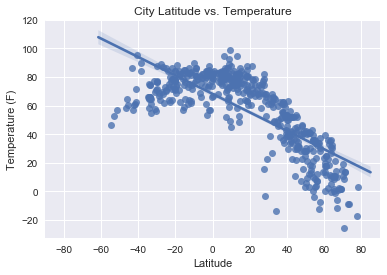

In [24]:
#Temperature (F) vs. Latitude
# note: if regression line is negative sloped, then winter is likely in the south hemisphere
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="Latitude", y="Temperature (F)", data=yo,fit_reg=True)
ax.set(xlim=(-90, 90))
ax.set_title("City Latitude vs. Temperature")
plt.show()

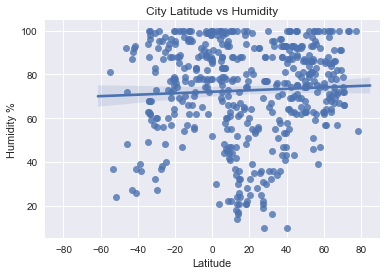

In [25]:
bx = sns.regplot(x="Latitude", y="Humidity %", data=yo,fit_reg=True)
bx.set(xlim=(-90, 90))
bx.set_title("City Latitude vs Humidity")
plt.show()

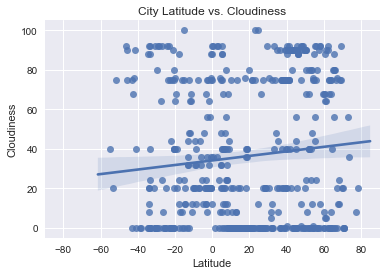

In [26]:
cx = sns.regplot(x="Latitude", y="Cloudiness", data=yo,fit_reg=True)
cx.set(xlim=(-90, 90))
cx.set_title("City Latitude vs. Cloudiness")
plt.show()

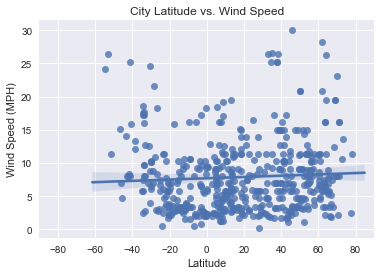

In [27]:
dx = sns.regplot(x="Latitude", y="Wind Speed (MPH)", data=yo,fit_reg=True)
dx.set(xlim=(-90, 90))
dx.set_title("City Latitude vs. Wind Speed")
plt.show()